In [3]:
from numpy import *
from matplotlib.pyplot import *
from matplotlib.patches import Patch

In [4]:
# y’ = f(t,y), y(t0)=y0

In [5]:
def f(t,y):
    return (t-3.2)*y + 8*t*exp((t-3.2)**2/2)*cos(4*t**2)

In [6]:
def dfy(t,y):
    return t-3.2

In [7]:
# y’ = f(t,y), y(t0)=y0

In [9]:
def sol(t,t0,y0):
    C = y0*exp(-(t0-3.2)**2/2)-sin(4*t0**2)
    return exp((t-3.2)**2/2)*(sin(4*t**2) + C)

In [10]:
#Runge-Kutta Metoda clasica in 4 pasi

In [11]:
def RK4(t0,tn,n,y0):
    h = abs(tn-t0)/n
    t = linspace(t0,tn,n+1)
    y = zeros(n+1)
    y[0] = y0
    for i in range(0,n):
        K1 = f(t[i],y[i])
        K2 = f(t[i]+h/2,y[i]+K1*h/2)
        K3 = f(t[i]+h/2,y[i]+K2*h/2)
        K4 = f(t[i]+h,y[i]+K3*h)
        y[i+1] = y[i] + h*(K1+2*K2+2*K3+K4)/6
    return y

In [12]:
#Adams-Bashforth in 3 pasi

In [13]:
def AdBash3(t0,tn,n,y0):
    h = abs(tn-t0)/n
    t = linspace(t0,tn,n+1)
    y = zeros(n+1)
    y[0:3] = RK4(t0,t0+2*h,2,y0)
    K1 = f(t[1],y[1])
    K2 = f(t[0],y[0])
    for i in range(2,n):
        K3 = K2
        K2 = K1
        K1 = f(t[i],y[i])
        y[i+1] = y[i] + h*(23*K1-16*K2+5*K3)/12
        
    return y

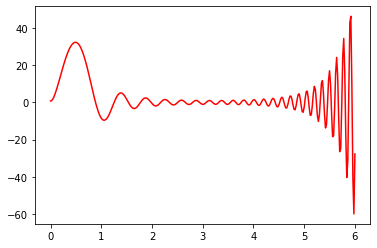

In [16]:
fg =1
n = 300
t0 = 0
tn = 6
y0 = .75
t = linspace(t0,tn,n+1)
ye = AdBash3(t0,tn,n,y0)
figure(fg)
plot(t,ye,'red',label='Adams-Bashforth 3')